# Keras를 이용한 CNN 구현

## CIFAR10 데이터 로드

In [1]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


### 데이터 확인

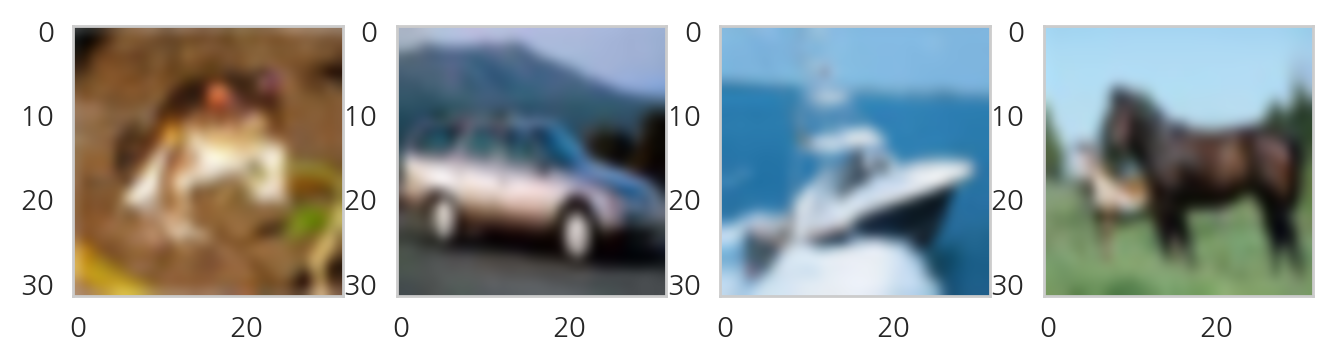

In [2]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

### 자료형 변환 및 스케일링

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [4]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

## 모형 구현

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

## 트레이닝

In [8]:
%%time
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
805s - loss: 2.3446 - acc: 0.1953 - val_loss: 2.0038 - val_acc: 0.2895
Epoch 2/50
799s - loss: 1.8346 - acc: 0.3548 - val_loss: 1.5998 - val_acc: 0.4470
Epoch 3/50
798s - loss: 1.6218 - acc: 0.4480 - val_loss: 1.4994 - val_acc: 0.4986
Epoch 4/50
798s - loss: 1.4549 - acc: 0.5235 - val_loss: 1.2818 - val_acc: 0.5847
Epoch 5/50
797s - loss: 1.3146 - acc: 0.5852 - val_loss: 1.1751 - val_acc: 0.6336
Epoch 6/50
798s - loss: 1.2116 - acc: 0.6293 - val_loss: 1.1841 - val_acc: 0.6374
Epoch 7/50
796s - loss: 1.1256 - acc: 0.6652 - val_loss: 1.0515 - val_acc: 0.6906
Epoch 8/50
796s - loss: 1.0624 - acc: 0.6915 - val_loss: 1.0393 - val_acc: 0.6980
Epoch 9/50
796s - loss: 1.0071 - acc: 0.7157 - val_loss: 0.9961 - val_acc: 0.7227
Epoch 10/50
796s - loss: 0.9634 - acc: 0.7335 - val_loss: 0.9150 - val_acc: 0.7507
Epoch 11/50
796s - loss: 0.9236 - acc: 0.7517 - val_loss: 0.9543 - val_acc: 0.7400
Epoch 12/50
796s - loss: 0.8937 - acc: 0.7654 

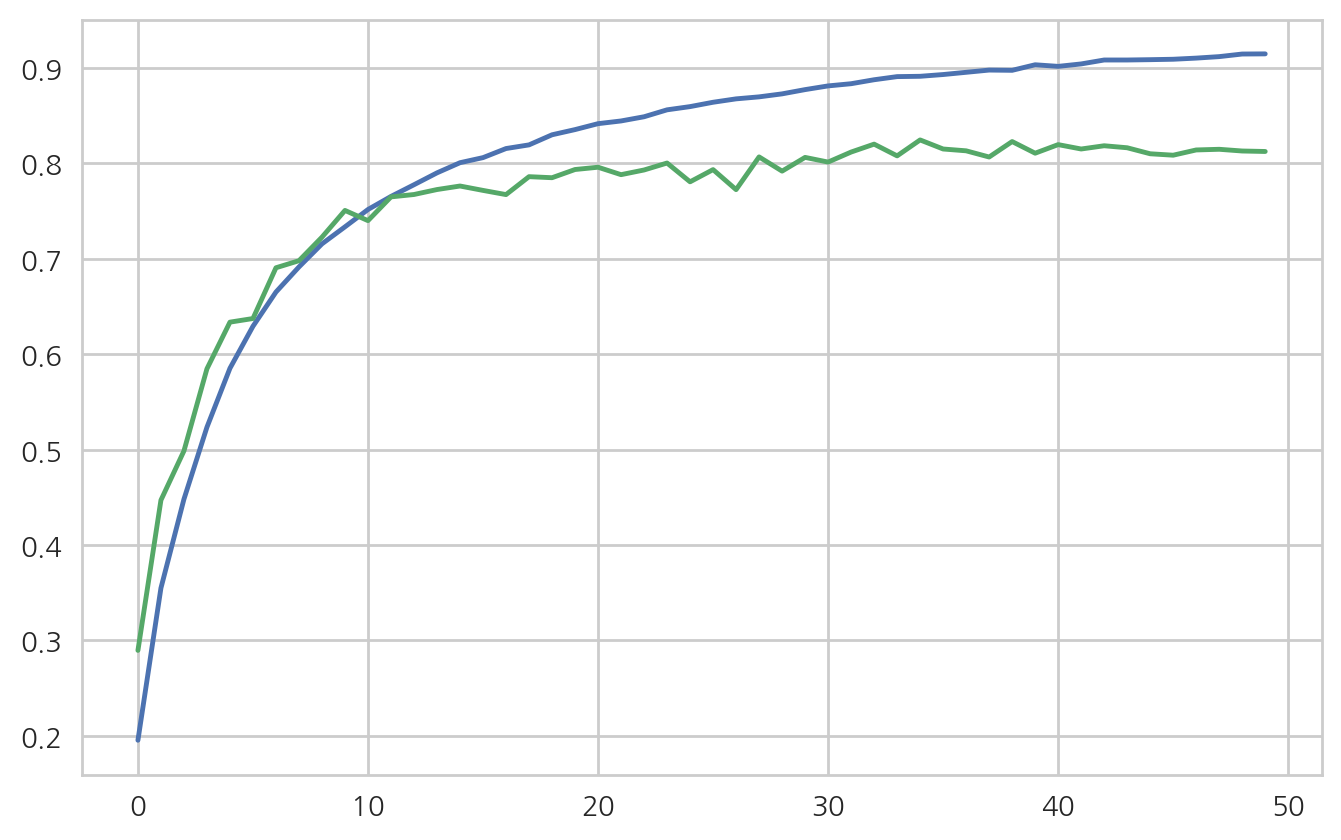

In [9]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.show()

In [10]:
model.save("cifar10_2.hdf5")